An entire Bayesian optimization process is shown here

In [1]:
%matplotlib inline
import jax
import jax.numpy as jnp
from jax import random, vmap
import matplotlib.pyplot as plt
import numpy as np
from optim_process import optim_process
# from optim_process_normal import optim_process # normalization
import screen

1 dim input

In [2]:
constrains = {'X': (-1.0, 2.0)}
noise = 1e-3
n_init = 3
dim = 1

# Define your objective function using JAX
def f(X, noise=noise):
    return -jnp.sin(3 * X) - X**2 + 0.7 * X + noise * random.normal(random.PRNGKey(0), X.shape)


optimize 

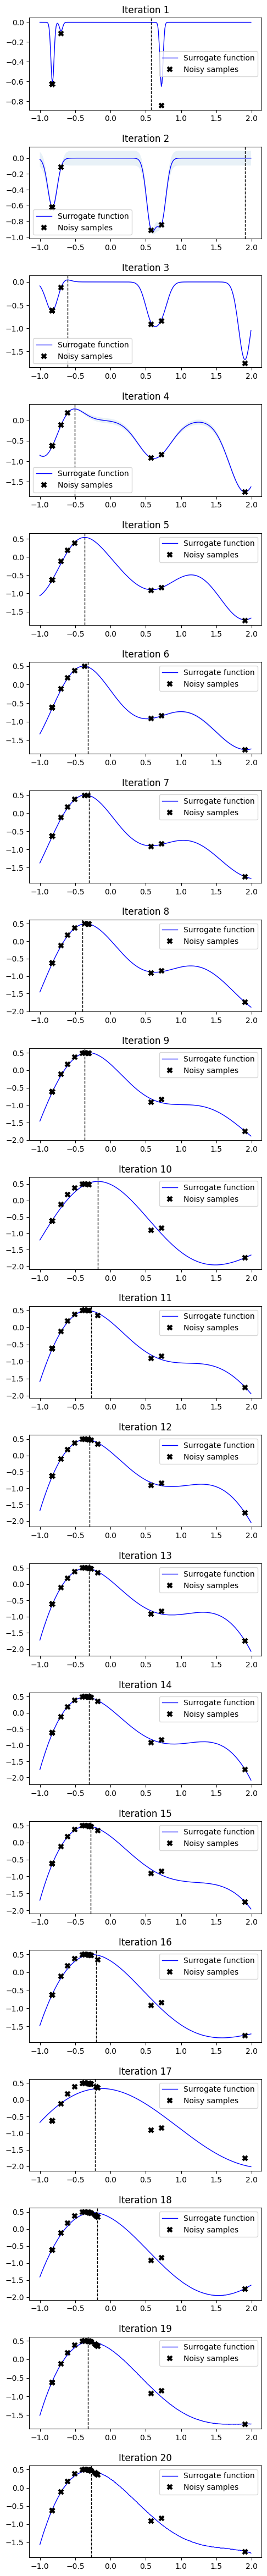

In [3]:
optimizer_params = optim_process(
    f,
    constrains,
    noise,
    n_init = n_init,
    seed = 42,
    dim = dim,
    n = 20,
    num_steps = 20,
    lr = 0.01,
    plot_figure = True)

In [4]:
optimizer_params.target

0.49997028708457947

In [5]:
optimizer_params.params

{'X': Array(-0.36546606, dtype=float32)}

have a look at function form

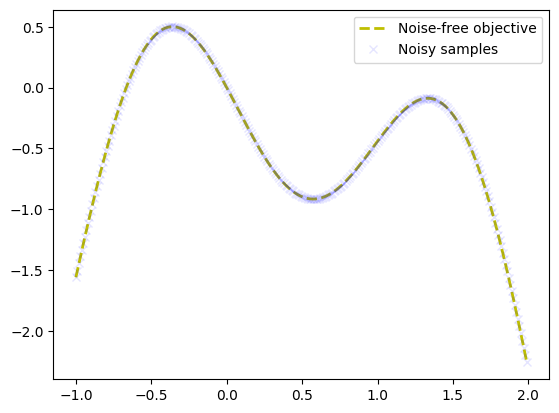

In [6]:
# Dense grid of points within bounds
X = jnp.arange(-1, 2, 0.01).reshape(-1, 1)
# Noise-free objective function values at X 
Y = f(X,0)
# Plot optimization objective with noise level 
plt.plot(X, Y, 'y--', lw=2, label='Noise-free objective')
plt.plot(X, f(X), 'bx', lw=1, alpha=0.1, label='Noisy samples')
# plt.plot(X_init, Y_init, 'kx', mew=3, label='Initial samples')
plt.legend();